<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Global Terrorism Database:</span> Exploratory Analysis</h1>
<hr>

Exploratory Analysis for <span style="color:royalblue">Global Terrorism Database</span>!

<br><hr id="toc">

### In this script...

In this scrip, I will go through the essential exploratory analysis steps:
1. [Basic information](#basic)
2. [Distributions of numeric features](#numeric)
3. [Distributions of categorical features](#categorical)
4. [Segmentations](#segmentations)
5. [Correlations](#correlations)




Data Source: https://www.kaggle.com/START-UMD/gtd

### First, let's import libraries and load the dataset.



In [1]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )

Print function ready to serve.


Next, let's import the libraries we'll need for this module.

In [2]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

Next, let's import the dataset. 


In [9]:
# Load GTD data from CSV
df = pd.read_csv('GTDcleanFinal.csv',encoding = "ISO-8859-1",low_memory=False)



In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.head()

eventid  iyear  imonth  iday  country country_txt  region  \
0  2.010000e+11   2012       1     1      153    Pakistan       6   
1  2.010000e+11   2012       1     1      104       Kenya      11   
2  2.010000e+11   2012       1     1      104       Kenya      11   
3  2.010000e+11   2012       1     1      153    Pakistan       6   
4  2.010000e+11   2012       1     1      153    Pakistan       6   

           region_txt                            provstate          city  \
0          South Asia                          Balochistan        Quetta   
1  Sub-Saharan Africa                        North Eastern       Garissa   
2  Sub-Saharan Africa                        North Eastern       Garissa   
3          South Asia                          Balochistan  Peer Chhatta   
4          South Asia  Federally Administered Tribal Areas      Salarzai   

    latitude  longitude  specificity  vicinity  crit1  crit2  crit3  \
0  30.209423  67.018009            1         0      1      1      1   
1  -0.456120  39.646123            1         0      1      1      1   
2  -0.456120  39.646123            1         0      1      1      1   
3  28.466667  67.283333            1         0      1      1      1   
4  34.761723  71.324719            1         0      1      1      1   

   doubtterr  multiple  success  suicide  attacktype1  \
0          0         0        1        0            3   
1          0         1        1        0            2   
2          0         1        1        0            2   
3          0         0        1        0            6   
4          0         0        1        0            3   

               attacktype1_txt  attacktype2 attacktype2_txt  attacktype3  \
0            Bombing/Explosion          NaN             NaN          NaN   
1                Armed Assault          NaN             NaN          NaN   
2                Armed Assault          NaN             NaN          NaN   
3  Hostage Taking (Kidnapping)          NaN             NaN          NaN   
4            Bombing/Explosion          NaN             NaN          NaN   

  attacktype3_txt  targtype1                 targtype1_txt  targsubtype1  \
0             NaN          1                      Business           2.0   
1             NaN          1                      Business           2.0   
2             NaN          1                      Business           2.0   
3             NaN         14   Private Citizens & Property          67.0   
4             NaN         17  Terrorists/Non-State Militia          94.0   

               targsubtype1_txt  natlty1 natlty1_txt  targtype2 targtype2_txt  \
0           Restaurant/Bar/Café    153.0    Pakistan        NaN           NaN   
1           Restaurant/Bar/Café    104.0       Kenya        NaN           NaN   
2           Restaurant/Bar/Café    104.0       Kenya        NaN           NaN   
3  Unnamed Civilian/Unspecified    153.0    Pakistan        NaN           NaN   
4             Non-State Militia    153.0    Pakistan        NaN           NaN   

   targsubtype2 targsubtype2_txt  natlty2 natlty2_txt  targtype3  \
0           NaN              NaN      NaN         NaN        NaN   
1           NaN              NaN      NaN         NaN        NaN   
2           NaN              NaN      NaN         NaN        NaN   
3           NaN              NaN      NaN         NaN        NaN   
4           NaN              NaN      NaN         NaN        NaN   

  targtype3_txt  targsubtype3 targsubtype3_txt  natlty3 natlty3_txt  \
0           NaN           NaN              NaN      NaN         NaN   
1           NaN           NaN              NaN      NaN         NaN   
2           NaN           NaN              NaN      NaN         NaN   
3           NaN           NaN              NaN      NaN         NaN   
4           NaN           NaN              NaN      NaN         NaN   

        gname gname2 gname3  guncertain1  guncertain2  guncertain3  claimed  \
0     Unknown    NaN    NaN            0          

Now we're ready to jump into exploring the data!

<br id="basic">
# 1. Basic information

First, always look at basic information about the dataset. 

<br>
Display the dimensions of the dataset.

In [12]:
# Dataframe dimensions
df.shape

(53720, 98)

Next, display the data types of our features.

In [13]:
# Column datatypes
df.dtypes

eventid               float64
iyear                   int64
imonth                  int64
iday                    int64
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity             int64
vicinity                int64
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr               int64
multiple                int64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype3_txt        object
targtype1               int64
targtype1_txt          object
targsubtype1          float64
                       ...   
weapsubtype2_txt       object
weaptype3             float64
weaptype3_

Display the first 5 rows to see example observations.

In [14]:
# Display first 5 rows of df
df[:5] #or we can use head below

eventid  iyear  imonth  iday  country country_txt  region  \
0  2.010000e+11   2012       1     1      153    Pakistan       6   
1  2.010000e+11   2012       1     1      104       Kenya      11   
2  2.010000e+11   2012       1     1      104       Kenya      11   
3  2.010000e+11   2012       1     1      153    Pakistan       6   
4  2.010000e+11   2012       1     1      153    Pakistan       6   

           region_txt                            provstate          city  \
0          South Asia                          Balochistan        Quetta   
1  Sub-Saharan Africa                        North Eastern       Garissa   
2  Sub-Saharan Africa                        North Eastern       Garissa   
3          South Asia                          Balochistan  Peer Chhatta   
4          South Asia  Federally Administered Tribal Areas      Salarzai   

    latitude  longitude  specificity  vicinity  crit1  crit2  crit3  \
0  30.209423  67.018009            1         0      1      1      1   
1  -0.456120  39.646123            1         0      1      1      1   
2  -0.456120  39.646123            1         0      1      1      1   
3  28.466667  67.283333            1         0      1      1      1   
4  34.761723  71.324719            1         0      1      1      1   

   doubtterr  multiple  success  suicide  attacktype1  \
0          0         0        1        0            3   
1          0         1        1        0            2   
2          0         1        1        0            2   
3          0         0        1        0            6   
4          0         0        1        0            3   

               attacktype1_txt  attacktype2 attacktype2_txt  attacktype3  \
0            Bombing/Explosion          NaN             NaN          NaN   
1                Armed Assault          NaN             NaN          NaN   
2                Armed Assault          NaN             NaN          NaN   
3  Hostage Taking (Kidnapping)          NaN             NaN          NaN   
4            Bombing/Explosion          NaN             NaN          NaN   

  attacktype3_txt  targtype1                 targtype1_txt  targsubtype1  \
0             NaN          1                      Business           2.0   
1             NaN          1                      Business           2.0   
2             NaN          1                      Business           2.0   
3             NaN         14   Private Citizens & Property          67.0   
4             NaN         17  Terrorists/Non-State Militia          94.0   

               targsubtype1_txt  natlty1 natlty1_txt  targtype2 targtype2_txt  \
0           Restaurant/Bar/Café    153.0    Pakistan        NaN           NaN   
1           Restaurant/Bar/Café    104.0       Kenya        NaN           NaN   
2           Restaurant/Bar/Café    104.0       Kenya        NaN           NaN   
3  Unnamed Civilian/Unspecified    153.0    Pakistan        NaN           NaN   
4             Non-State Militia    153.0    Pakistan        NaN           NaN   

   targsubtype2 targsubtype2_txt  natlty2 natlty2_txt  targtype3  \
0           NaN              NaN      NaN         NaN        NaN   
1           NaN              NaN      NaN         NaN        NaN   
2           NaN              NaN      NaN         NaN        NaN   
3           NaN              NaN      NaN         NaN        NaN   
4           NaN              NaN      NaN         NaN        NaN   

  targtype3_txt  targsubtype3 targsubtype3_txt  natlty3 natlty3_txt  \
0           NaN           NaN              NaN      NaN         NaN   
1           NaN           NaN              NaN      NaN         NaN   
2           NaN           NaN              NaN      NaN         NaN   
3           NaN           NaN              NaN      NaN         NaN   
4           NaN           NaN              NaN      NaN         NaN   

        gname gname2 gname3  guncertain1  guncertain2  guncertain3  claimed  \
0     Unknown    NaN    NaN            0          

## Filtering on data types

<br>
**First, try to filter <code style="color:steelblue">df.dtypes</code> to only categorical variables.**
* **Tip:** A Series can be filtered by boolean masks the same way that a DataFrame can be.

In [15]:
df.select_dtypes(exclude=[np.number]).columns.tolist()

['country_txt',
 'region_txt',
 'provstate',
 'city',
 'attacktype1_txt',
 'attacktype2_txt',
 'attacktype3_txt',
 'targtype1_txt',
 'targsubtype1_txt',
 'natlty1_txt',
 'targtype2_txt',
 'targsubtype2_txt',
 'natlty2_txt',
 'targtype3_txt',
 'targsubtype3_txt',
 'natlty3_txt',
 'gname',
 'gname2',
 'gname3',
 'claimmode_txt',
 'claimmode2_txt',
 'claimmode3_txt',
 'weaptype1_txt',
 'weapsubtype1_txt',
 'weaptype2_txt',
 'weapsubtype2_txt',
 'weaptype3_txt',
 'weapsubtype3_txt',
 'propextent_txt',
 'hostkidoutcome_txt',
 'dbsource',
 'related']

In [16]:
# Filter and display only df.dtypes that are 'object'
df.dtypes[df.dtypes == 'object']

country_txt           object
region_txt            object
provstate             object
city                  object
attacktype1_txt       object
attacktype2_txt       object
attacktype3_txt       object
targtype1_txt         object
targsubtype1_txt      object
natlty1_txt           object
targtype2_txt         object
targsubtype2_txt      object
natlty2_txt           object
targtype3_txt         object
targsubtype3_txt      object
natlty3_txt           object
gname                 object
gname2                object
gname3                object
claimmode_txt         object
claimmode2_txt        object
claimmode3_txt        object
weaptype1_txt         object
weapsubtype1_txt      object
weaptype2_txt         object
weapsubtype2_txt      object
weaptype3_txt         object
weapsubtype3_txt      object
propextent_txt        object
hostkidoutcome_txt    object
dbsource              object
related               object
dtype: object

In [17]:
# Filter and display only df.dtypes that are not 'object'
# this prints out all rows that meet this criterion

df.select_dtypes(exclude=['object'])

eventid  iyear  imonth  iday  country  region   latitude  \
0      2.010000e+11   2012       1     1      153       6  30.209423   
1      2.010000e+11   2012       1     1      104      11  -0.456120   
2      2.010000e+11   2012       1     1      104      11  -0.456120   
3      2.010000e+11   2012       1     1      153       6  28.466667   
4      2.010000e+11   2012       1     1      153       6  34.761723   
5      2.010000e+11   2012       1     1       95      10  34.193514   
6      2.010000e+11   2012       1     1        4       6  30.996068   
7      2.010000e+11   2012       1     1      153       6  34.098900   
8      2.010000e+11   2012       1     1      229      11  -2.694693   
9      2.010000e+11   2012       1     1       95      10  35.468830   
10     2.010000e+11   2012       1     1      153       6  32.929773   
11     2.010000e+11   2012       1     1       95      10  33.238757   
12     2.010000e+11   2012       1     1       95      10  33.238757   
13     2.010000e+11   2012       1     1       92       6  24.817544   
14     2.010000e+11   2012       1     1      217       1  30.488927   
15     2.010000e+11   2012       1     2      147      11  11.833333   
16     2.010000e+11   2012       1     2      153       6  25.416797   
17     2.010000e+11   2012       1     2      153       6  24.933308   
18     2.010000e+11   2012       1     2        4       6  31.379885   
19     2.010000e+11   2012       1     2       92       6  27.491929   
20     2.010000e+11   2012       1     2        4       6  34.002047   
21     2.010000e+11   2012       1     2       95      10  33.699969   
22     2.010000e+11   2012       1     2       95      10  34.333894   
23     2.010000e+11   2012       1     2        4       6  34.343559   
24     2.010000e+11   2012       1     1        4       6  35.580278   
25     2.010000e+11   2012       1     2       95      10  33.350000   
26     2.010000e+11   2012       1     2        4       6  32.623739   
27     2.010000e+11   2012       1     2        4       6  33.970982   
28     2.010000e+11   2012       1     2      141       6  26.999920   
29     2.010000e+11   2012       1     3      153       6  34.004345   
...             ...    ...     ...   ...      ...     ...        ...   
53690  2.020000e+11   2016      12    30       95      10  36.388713   
53691  2.020000e+11   2016      12    30      147      11  10.241977   
53692  2.020000e+11   2016      12    30      147      11  10.241977   
53693  2.020000e+11   2016      12    30      160       5   6.951292   
53694  2.020000e+11   2016      12    31        4       6  36.062742   
53695  2.020000e+11   2016      12    31       92       6  34.409556   
53696  2.020000e+11   2016      12    31      153       6  29.182136   
53697  2.020000e+11   2016      12    31        4       6  35.957710   
53698  2.020000e+11   2016      12    31        4       6  35.856925   
53699  2.020000e+11   2016      12    31        4       6  35.842058   
53700  2.020000e+11   2016      12    31       60      10  31.132297   
53701  2.020000e+11   2016      12    31      160       5   7.059926   
53702  2.020000e+11   2016      12    31       19       6  25.564362   
53703  2.020000e+11   2016      12    30      153       6  30.661181   
53704  2.020000e+11   2016      12    31        4       6  34.533342   
53705  2.020000e+11   2016      12    31       34      11  -3.253245   
53706  2.020000e+11   2016      12    31      153       6  34.014975   
53707  2.020000e+11   2016      12    31       92       6  24.806454   
53708  2.020000e+11   2016      12    31        4       6  32.372459   
53709  2.020000e+11   2016      12    31      147      11  11.831098   
53710  2.020000e+11   2016      12    31       95      10  33.381146   
53711  2.020000e+11   2016      12    31       95      10  33.332813   
53712  2.020000e+11   2016      12    31       95      10  33.332813   
53713  2.020000e+11   2016      12    31       95   

By the way, to actually get the **feature names** that you can iterate through, you have to access the <code style="color:steelblue">.index</code> attribute.

<br>
**Iterate through the categorical feature names and print each name.**
* **Tip:** Filter as you did above, and then call the <code style="color:steelblue">.index</code> attribute

In [18]:
# Loop through categorical feature names and print each one
for feature in df.dtypes[df.dtypes == 'object'].index:
    print(feature)

country_txt
region_txt
provstate
city
attacktype1_txt
attacktype2_txt
attacktype3_txt
targtype1_txt
targsubtype1_txt
natlty1_txt
targtype2_txt
targsubtype2_txt
natlty2_txt
targtype3_txt
targsubtype3_txt
natlty3_txt
gname
gname2
gname3
claimmode_txt
claimmode2_txt
claimmode3_txt
weaptype1_txt
weapsubtype1_txt
weaptype2_txt
weapsubtype2_txt
weaptype3_txt
weapsubtype3_txt
propextent_txt
hostkidoutcome_txt
dbsource
related


As you'll see later, the ability to select feature names based on some condition (instead of manually typing out each one) will be quite useful.

<br>
**Next, look at a few more examples by displaying the first 10 rows of data, instead of just the first 5.**
* **Tip:** <code style="color:steelblue">df.head()</code> returns the first 5 rows by default, but you can pass in an integer argument for the number of rows you want.

In [19]:
# Display the first 10 rows of data
df.head(10)

eventid  iyear  imonth  iday  country  \
0  2.010000e+11   2012       1     1      153   
1  2.010000e+11   2012       1     1      104   
2  2.010000e+11   2012       1     1      104   
3  2.010000e+11   2012       1     1      153   
4  2.010000e+11   2012       1     1      153   
5  2.010000e+11   2012       1     1       95   
6  2.010000e+11   2012       1     1        4   
7  2.010000e+11   2012       1     1      153   
8  2.010000e+11   2012       1     1      229   
9  2.010000e+11   2012       1     1       95   

                        country_txt  region                  region_txt  \
0                          Pakistan       6                  South Asia   
1                             Kenya      11          Sub-Saharan Africa   
2                             Kenya      11          Sub-Saharan Africa   
3                          Pakistan       6                  South Asia   
4                          Pakistan       6                  South Asia   
5                              Iraq      10  Middle East & North Africa   
6                       Afghanistan       6                  South Asia   
7                          Pakistan       6                  South Asia   
8  Democratic Republic of the Congo      11          Sub-Saharan Africa   
9                              Iraq      10  Middle East & North Africa   

                             provstate          city   latitude  longitude  \
0                          Balochistan        Quetta  30.209423  67.018009   
1                        North Eastern       Garissa  -0.456120  39.646123   
2                        North Eastern       Garissa  -0.456120  39.646123   
3                          Balochistan  Peer Chhatta  28.466667  67.283333   
4  Federally Administered Tribal Areas      Salarzai  34.761723  71.324719   
5                              Saladin       Samarra  34.193514  43.875255   
6                             Kandahar       Sanzari  30.996068  65.475736   
7  Federally Administered Tribal Areas   Landi Kotal  34.098900  71.149780   
8                           South Kivu      Shabunda  -2.694693  27.341538   
9                               Kirkuk    Qara Durra  35.468830  44.390980   

   specificity  vicinity  crit1  crit2  crit3  doubtterr  multiple  success  \
0            1         0      1      1      1          0         0        1   
1            1         0      1      1      1          0         1        1   
2            1         0      1      1      1          0         1        1   
3            1         0      1      1      1          0         0        1   
4            1         0      1      1      1          0         0        1   
5            1         1      1      1      1          0         0        0   
6            2         0      1      1      1          0         0        0   
7            1         1      1      1      1          0         0        1   
8            2         0      1      1      1          0         1        1   
9            2         0      1      1      1          0         0        1   

   suicide  attacktype1                 attacktype1_txt  attacktype2  \
0        0            3               Bombing/Explosion          NaN   
1        0            2                   Armed Assault          NaN   
2        0            2                   Armed Assault          NaN   
3        0            6     Hostage Taking (Kidnapping)          NaN   
4        0            3               Bombing/Explosion          NaN   
5        0            1                   Assassination          NaN   
6        0            3               Bombing/Explosion          NaN   
7        0            3               Bombing/Explosion          NaN   
8        0            7  Facility/Infrastructure Attack          NaN   
9        0            3               Bombing/Explosion          NaN   

  attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0             NaN          NaN             NaN          1  

Finally, it's also helpful to look at the last 5 rows of data.
* Sometimes datasets will have **funky data** at the end (for example, an extra row in a csv file) which depends on the data source.
* It is a good idea to always check our data thoroughly.

<br>
**Display the last 5 rows of data.**


In [20]:
# Display last 5 rows of data
df.tail()

eventid  iyear  imonth  iday  country  \
53715  2.020000e+11   2016      12    31      153   
53716  2.020000e+11   2016      12    30        4   
53717  2.020000e+11   2016      12    31        4   
53718  2.020000e+11   2016      12    31      160   
53719  2.020000e+11   2016      12    31      229   

                            country_txt  region          region_txt  \
53715                          Pakistan       6          South Asia   
53716                       Afghanistan       6          South Asia   
53717                       Afghanistan       6          South Asia   
53718                       Philippines       5      Southeast Asia   
53719  Democratic Republic of the Congo      11  Sub-Saharan Africa   

                provstate               city   latitude   longitude  \
53715  Khyber Pakhtunkhwa           Gajukhel  33.803879   72.025434   
53716             Jawzjan  Mangajek district  37.007020   66.026738   
53717             Helmand        Lashkar Gah  31.583664   64.368699   
53718         Maguindanao            Talitay   7.027067  124.386552   
53719            Bas-Uele         Nakolongbo   4.308611   25.091389   

       specificity  vicinity  crit1  crit2  crit3  doubtterr  multiple  \
53715            1         0      1      1      1          0         0   
53716            3         0      1      1      1          0         0   
53717            1         0      1      1      1          0         0   
53718            1         0      1      1      1          0         0   
53719            2         0      1      1      1          0         0   

       success  suicide  attacktype1              attacktype1_txt  \
53715        1        0            2                Armed Assault   
53716        1        0            3            Bombing/Explosion   
53717        1        0            3            Bombing/Explosion   
53718        1        0            3            Bombing/Explosion   
53719        1        0            6  Hostage Taking (Kidnapping)   

       attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
53715          NaN             NaN          NaN             NaN          3   
53716          NaN             NaN          NaN             NaN         17   
53717          NaN             NaN          NaN             NaN         14   
53718          NaN             NaN          NaN             NaN         12   
53719          NaN             NaN          NaN             NaN         14   

                      targtype1_txt  targsubtype1  \
53715                        Police          25.0   
53716  Terrorists/Non-State Militia          94.0   
53717   Private Citizens & Property          67.0   
53718                           NGO           NaN   
53719   Private Citizens & Property          75.0   

                      targsubtype1_txt  natlty1  \
53715  Police Security Forces/Officers    153.0   
53716                Non-State Militia      4.0   
53717     Unnamed Civilian/Unspecified      4.0   
53718                              NaN    160.0   
53719         Village/City/Town/Suburb    229.0   

                            natlty1_txt  targtype2 targtype2_txt  \
53715                          Pakistan        NaN           NaN   
53716                       Afghanistan        NaN           NaN   
53717                       Afghanistan        NaN           NaN   
53718                       Philippines        4.0      Military   
53719  Democratic Republic of the Congo        NaN           NaN   

       targsubtype2           targsubtype2_txt  natlty2  natlty2_txt  \
53715           NaN                        NaN      NaN          NaN   
53716           NaN                        NaN      NaN          NaN   
53717           NaN                        NaN      NaN          NaN   
53718           4.0  Multinational Corporation    160.0  Philippines   
53719           NaN                        NaN      NaN          NaN   

       targtype3 targtype3_txt  targsubtyp

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br id="numeric">
# 2. Distributions of numeric features

One of the most enlightening data exploration tasks is plotting the distributions of your features.

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 1.2</span>

**Plot the histogram grid, but make it larger, and rotate the x-axis labels clockwise by 45 degrees.**
* <code style="color:steelblue">df.hist()</code> has a <code style="color:steelblue">figsize=</code> argument takes a tuple for figure size.
* Try making the figure size 14 x 14
* <code style="color:steelblue">df.hist()</code> has a <code style="color:steelblue">xrot=</code> argument rotates x-axis labels **counter-clockwise**.
* The [documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.hist.html) is useful for learning more about the arguments to the <code style="color:steelblue">.hist()</code> function.


<function matplotlib.pyplot.show>

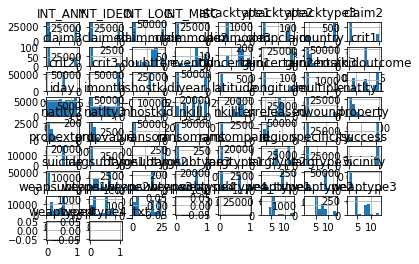

In [21]:
# First Attempt - smaller grid
# Plot histogram grid
df.hist()
# Clear the text "residue"
plt.show

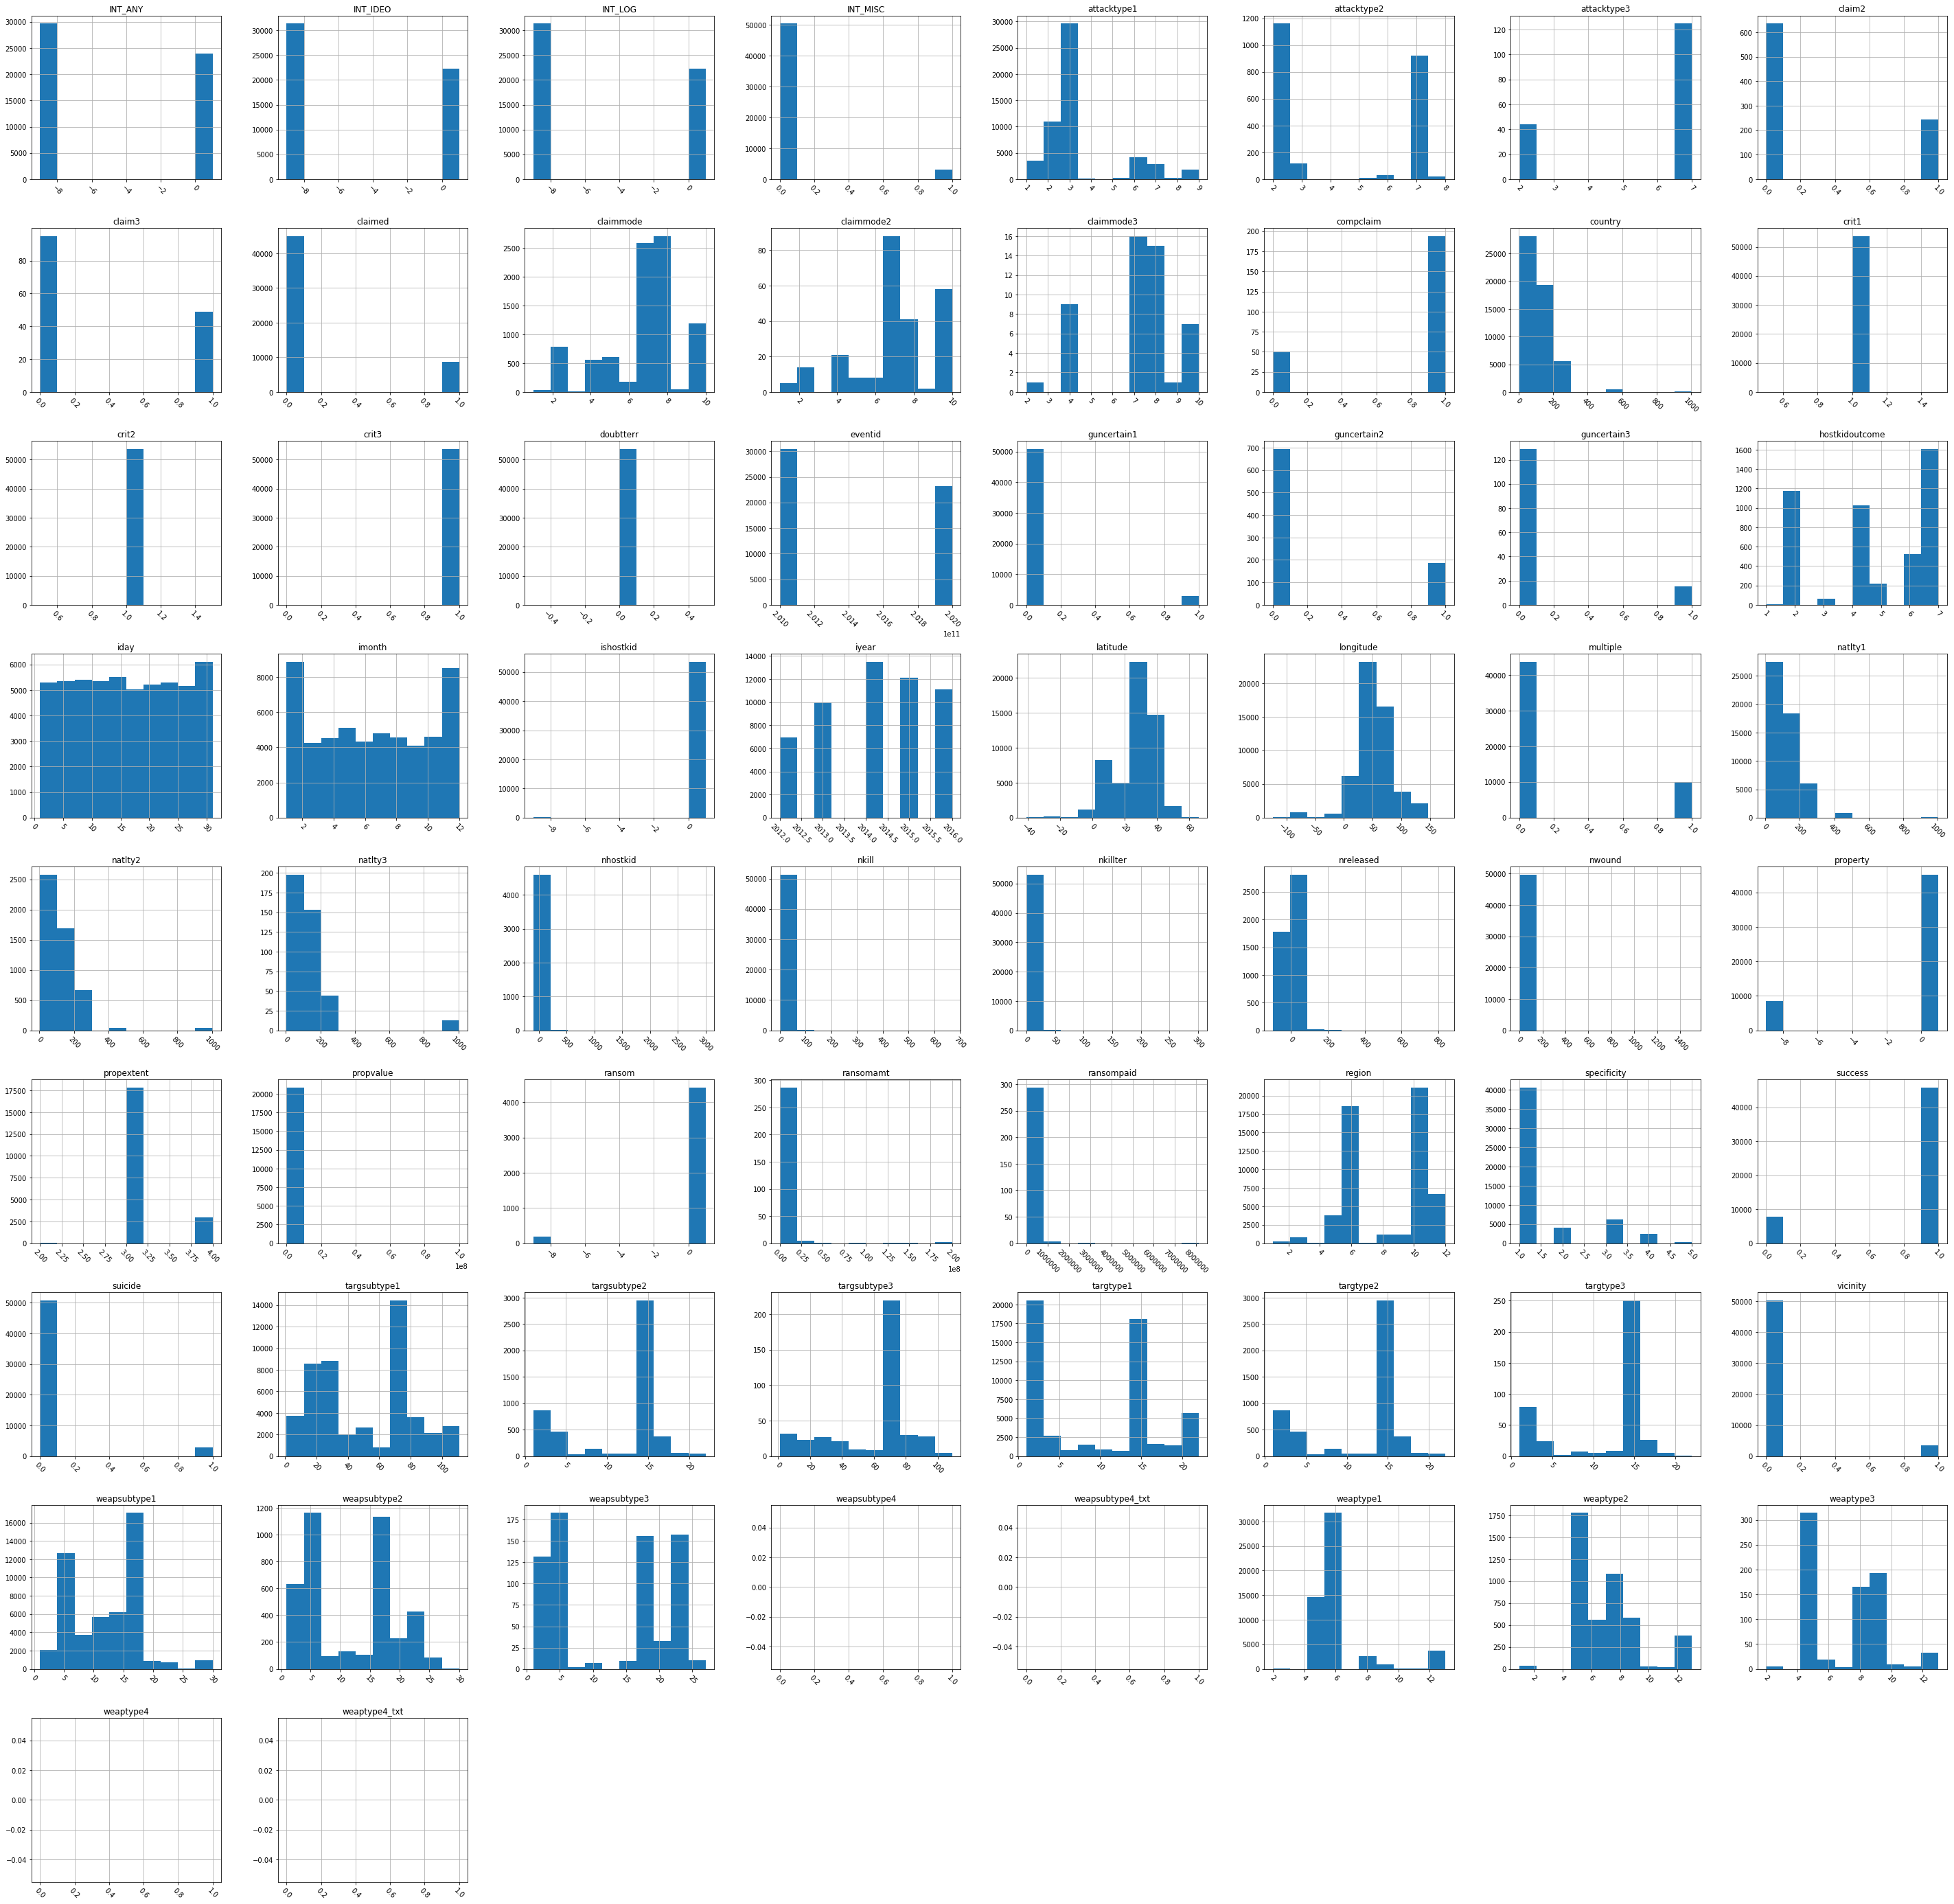

In [23]:
# DataFrame.hist(data, column=None, by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=10, **kwds)
df.hist(figsize=(50,50), xrot=-45, grid=True)
plt.show()

Display summary statistics for the numerical features.

In [24]:
# Summarize numerical features
df.describe()

eventid         iyear        imonth          iday       country  \
count  5.372000e+04  53720.000000  53720.000000  53720.000000  53720.000000   
mean   2.014327e+11   2014.194322      6.447915     15.668634    120.605529   
std    4.954606e+08      1.311302      3.413368      8.805290     91.532307   
min    2.010000e+11   2012.000000      1.000000      1.000000      4.000000   
25%    2.010000e+11   2013.000000      4.000000      8.000000     92.000000   
50%    2.010000e+11   2014.000000      6.000000     15.000000     95.000000   
75%    2.020000e+11   2015.000000      9.000000     23.000000    153.000000   
max    2.020000e+11   2016.000000     12.000000     31.000000   1004.000000   

             region      latitude     longitude   specificity      vicinity  \
count  53720.000000  53397.000000  53397.000000  53720.000000  53720.000000   
mean       8.173418     26.767115     51.794839      1.465097      0.062547   
std        2.298684     12.615627     32.174457      0.904602      0.242148   
min        1.000000    -41.133472   -124.224996      1.000000      0.000000   
25%        6.000000     18.437287     39.209312      1.000000      0.000000   
50%       10.000000     32.559761     44.583333      1.000000      0.000000   
75%       10.000000     34.099578     69.883565      1.000000      0.000000   
max       12.000000     65.825119    176.986756      5.000000      1.000000   

         crit1    crit2         crit3  doubtterr      multiple       success  \
count  53720.0  53720.0  53720.000000    53720.0  53720.000000  53720.000000   
mean       1.0      1.0      0.999907        0.0      0.186709      0.854300   
std        0.0      0.0      0.009647        0.0      0.389681      0.352808   
min        1.0      1.0      0.000000        0.0      0.000000      0.000000   
25%        1.0      1.0      1.000000        0.0      0.000000      1.000000   
50%        1.0      1.0      1.000000        0.0      0.000000      1.000000   
75%        1.0      1.0      1.000000        0.0      0.000000      1.000000   
max        1.0      1.0      1.000000        0.0      1.000000      1.000000   

            suicide   attacktype1  attacktype2  attacktype3     targtype1  \
count  53720.000000  53720.000000  2260.000000   169.000000  53720.000000   
mean       0.053295      3.344267     4.210177     5.698225      9.597561   
std        0.224623      1.797224     2.436912     2.200662      6.760671   
min        0.000000      1.000000     2.000000     2.000000      1.000000   
25%        0.000000      2.000000     2.000000     2.000000      3.000000   
50%        0.000000      3.000000     2.000000     7.000000     13.000000   
75%        0.000000      3.000000     7.000000     7.000000     14.000000   
max        1.000000      9.000000     8.000000     7.000000     22.000000   

       targsubtype1       natlty1    targtype2  targsubtype2      natlty2  \
count  49609.000000  52899.000000  5030.000000   5030.000000  5022.000000   
mean      50.121631    122.775931    11.155268     11.156461   123.079849   
std       30.680340     86.592092     5.301447      5.299836   107.727260   
min        1.000000      4.000000     1.000000      1.000000     4.000000   
25%       23.000000     92.000000     4.000000      4.000000    92.000000   
50%       49.000000     95.000000    14.000000     14.000000    95.000000   
75%       75.000000    153.000000    14.000000     14.000000   182.000000   
max      111.000000   1004.000000    22.000000     22.000000  1004.000000   

        targtype3  targsubtype3      natlty3   guncertain1  guncertain2  \
count  408.000000    402.000000   408.000000  53720.000000   882.000000   
mean    11.107843     58.320896   139.294118      0.052587     0.212018   
std      5.326964     25.181714   171.382847      0.223211     0.408970   
min      1.000000      1.000000     4.000000      0.000000     0.000000   
25%      4.000000     39.000000    60.000000      0.000000     0.000000   
50%     14.000000     67.0000

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br id="categorical">
# 3. Distributions of categorical features

Next, let's take a look at the distributions of our categorical features.

<br>
Display summary statistics for categorical features.

In [25]:
# Summarize categorical features
df.describe(include=['object'])

country_txt                  region_txt provstate     city  \
count        53720                       53720     53720    53720   
unique         137                          12      1074    14210   
top           Iraq  Middle East & North Africa   Baghdad  Baghdad   
freq         12519                       21133      3721     3689   

          attacktype1_txt attacktype2_txt                 attacktype3_txt  \
count               53720            2260                             169   
unique                  9               6                               2   
top     Bombing/Explosion   Armed Assault  Facility/Infrastructure Attack   
freq                29680            1163                             125   

                      targtype1_txt              targsubtype1_txt natlty1_txt  \
count                         53720                         49609       52899   
unique                           22                           108         151   
top     Private Citizens & Property  Unnamed Civilian/Unspecified        Iraq   
freq                          16318                          4752       12478   

                      targtype2_txt      targsubtype2_txt natlty2_txt  \
count                          5030                  5030        5022   
unique                           20                    20          94   
top     Private Citizens & Property  Judge/Attorney/Court        Iraq   
freq                           2898                  2898        1071   

                      targtype3_txt              targsubtype3_txt  \
count                           408                           402   
unique                           19                            67   
top     Private Citizens & Property  Unnamed Civilian/Unspecified   
freq                            247                           158   

        natlty3_txt    gname         gname2  \
count           408    53720            882   
unique           51      714            205   
top     Afghanistan  Unknown  Badr Brigades   
freq             80    28915             52   

                                             gname3   claimmode_txt  \
count                                           144            8733   
unique                                           57              10   
top     Islamic State of Iraq and the Levant (ISIL)  Personal claim   
freq                                             13            2711   

                       claimmode2_txt                 claimmode3_txt  \
count                             245                             49   
unique                              9                              6   
top     Posted to website, blog, etc.  Posted to website, blog, etc.   
freq                               88                             16   

                    weaptype1_txt        weapsubtype1_txt weaptype2_txt  \
count                       53720                   49893          4461   
unique                         10                      28            11   
top     Explosives/Bombs/Dynamite  Unknown Explosive Type      Firearms   
freq                        31728                   12423          1777   

        weapsubtype2_txt weaptype3_txt  weapsubtype3_txt  \
count               3999           745               690   
unique                26            10                19   
top     Unknown Gun Type      Firearms  Unknown Gun Type   
freq                1042           314               149   

                     propextent_txt hostkidoutcome_txt  \
count                         20873               4617   
unique                            3                  7   
top     Minor (likely < $1 million)            Unknown   
freq                          17853               1608   

                        dbsource  \
count                      53720   
unique                         1   
top     START Primary Collection   
freq                       53720   

                                                  relat

Plot bar plot for the <code style="color:steelblue">'attacktype1_txt'</code> feature.

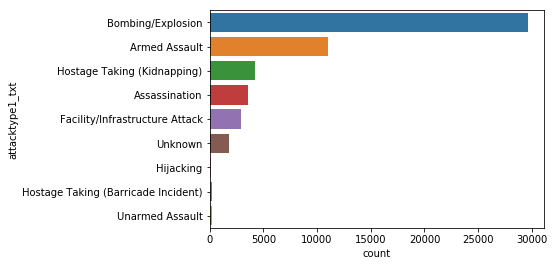

In [27]:
# Bar plot for 'attacktype1_txt'
sns.countplot(y='attacktype1_txt', data=df)

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">BAR PLOTS FOR CATEGORICAL VARS</span>

**Write a <code style="color:steelblue">for</code> loop to plot bar plots of each of the categorical features.**
 <span style="color:royalblue"></span>).
* Invoke <code style="color:steelblue">plt.show()</code> after each bar plot to display all  plots in one output.
* Which features suffer from sparse classes?

In [29]:
?sns.countplot

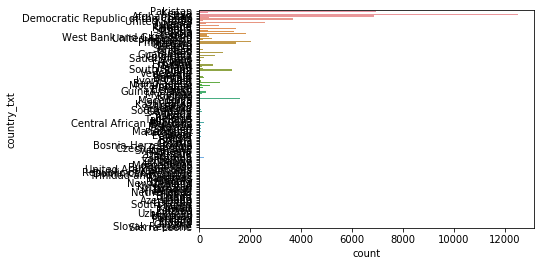

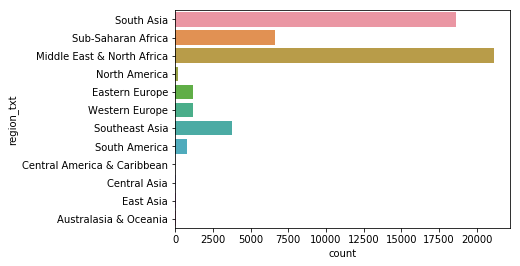

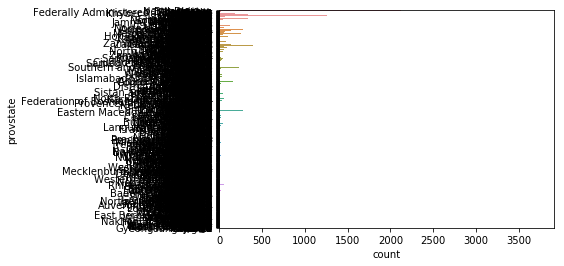

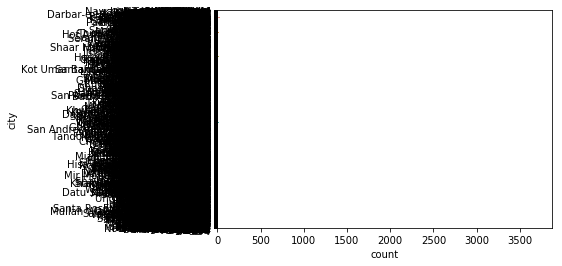

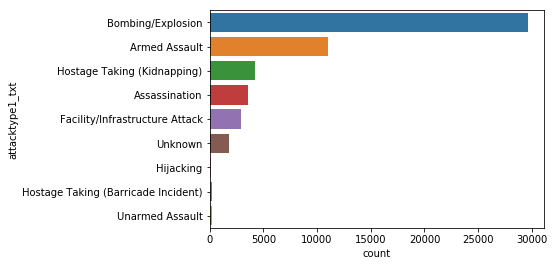

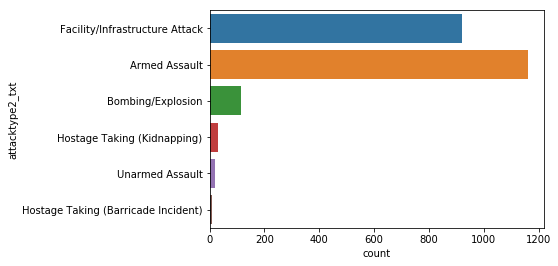

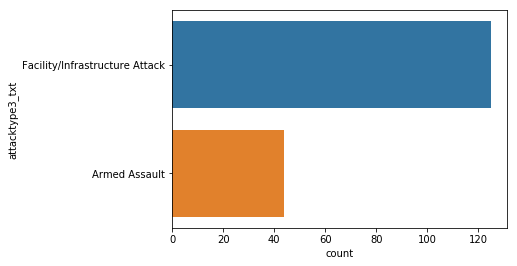

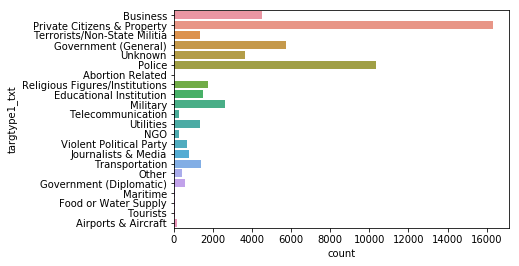

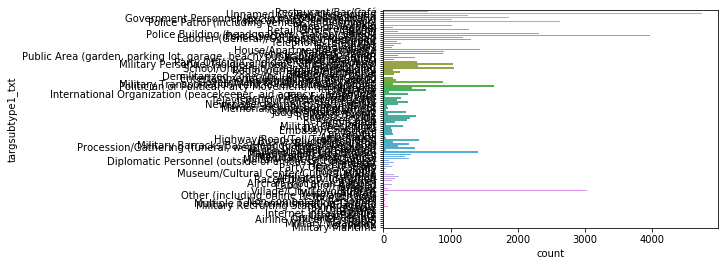

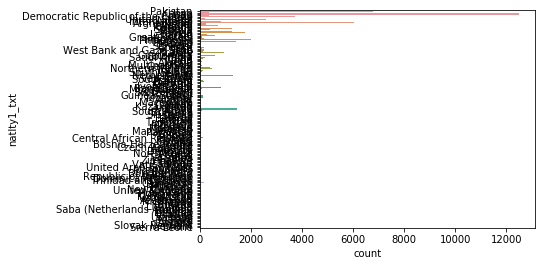

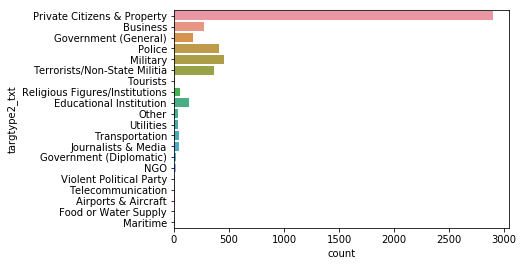

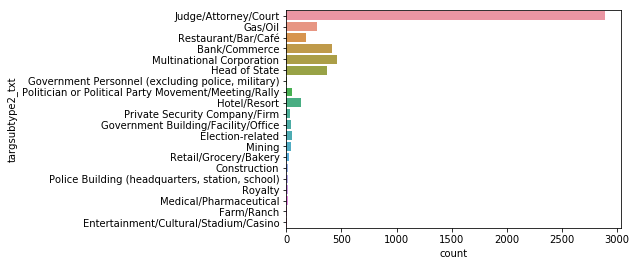

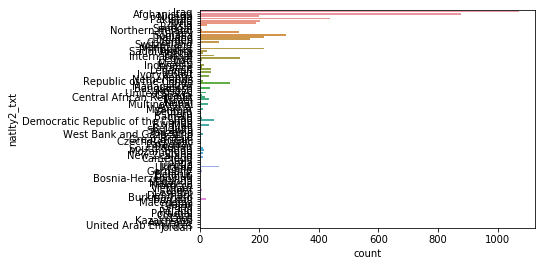

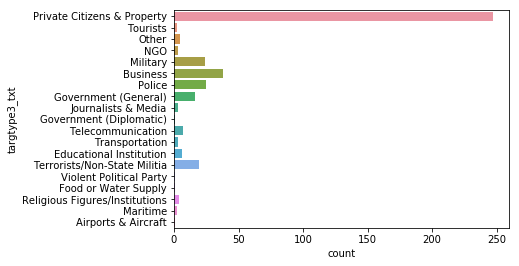

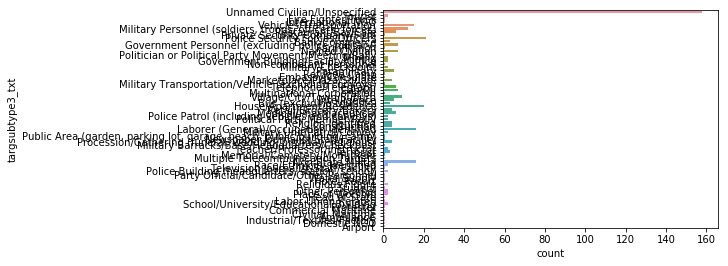

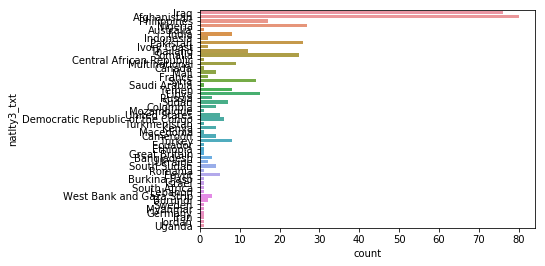

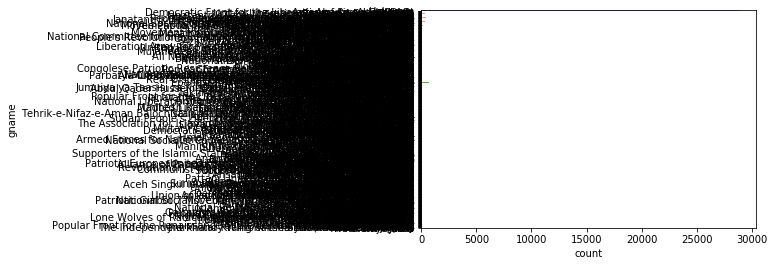

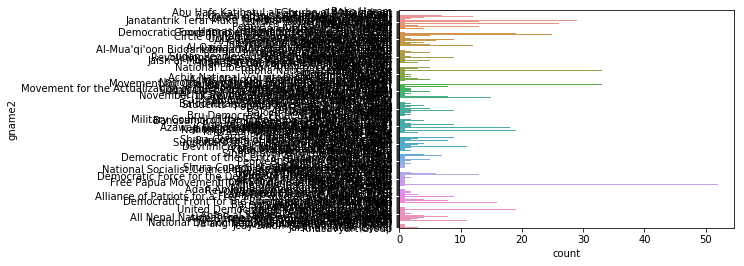

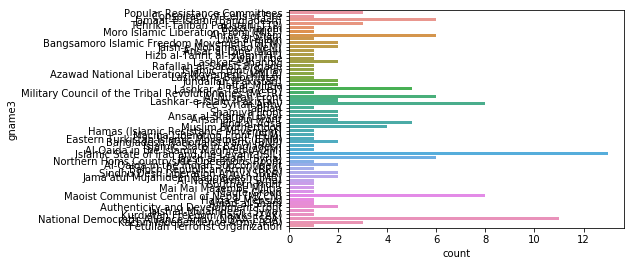

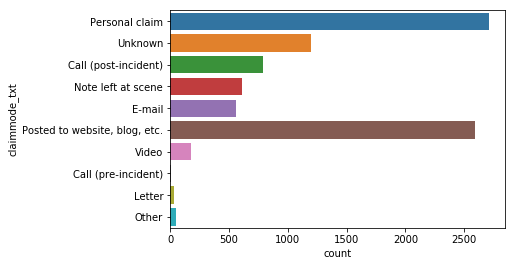

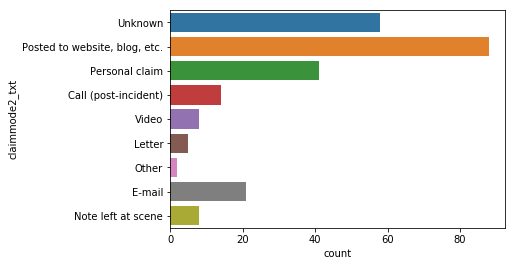

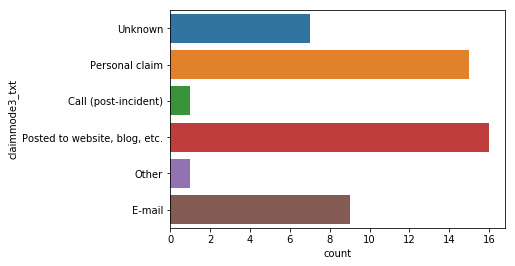

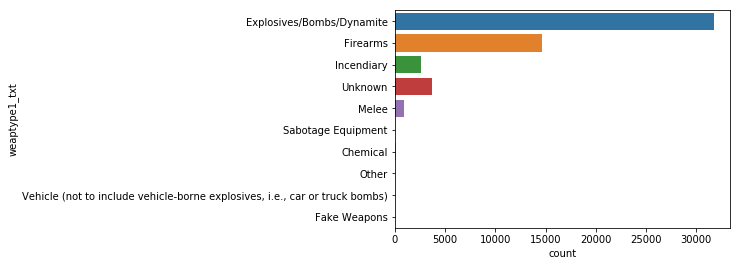

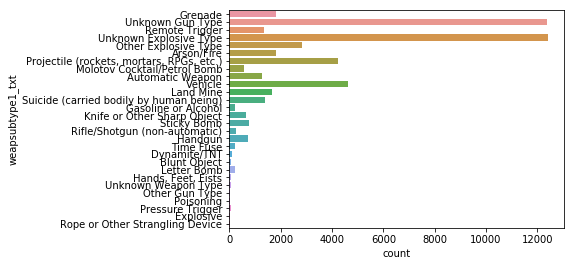

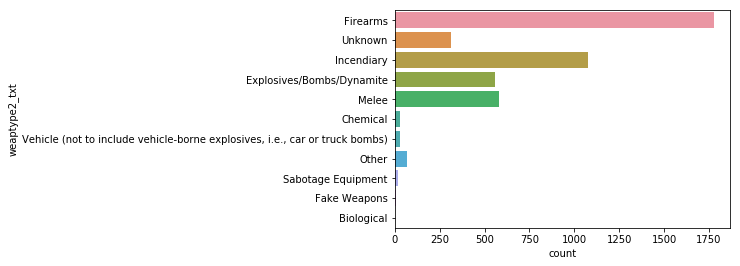

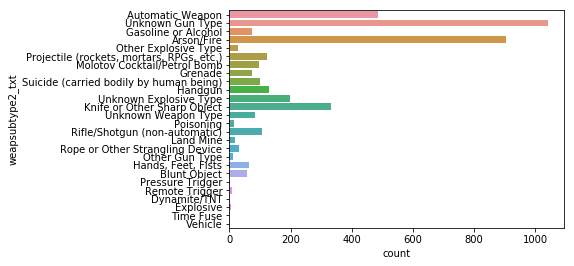

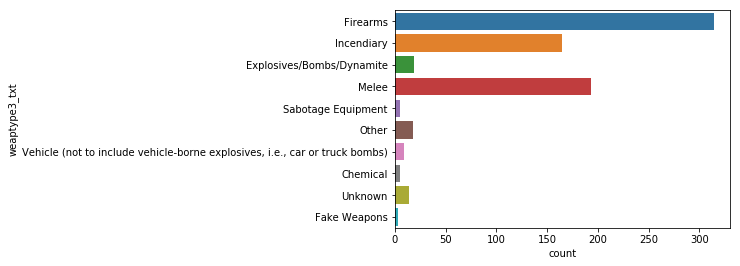

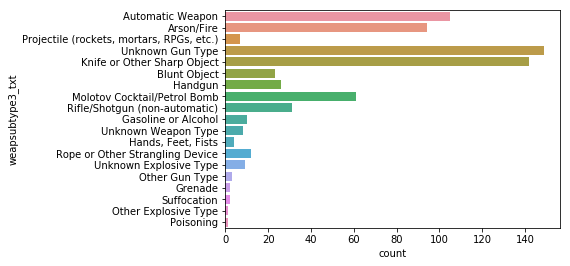

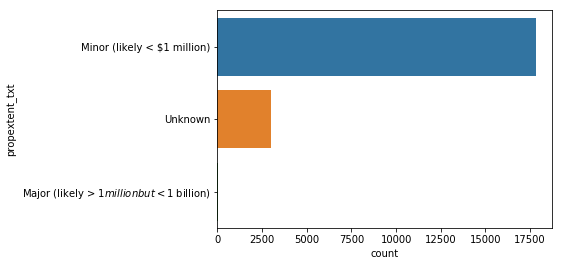

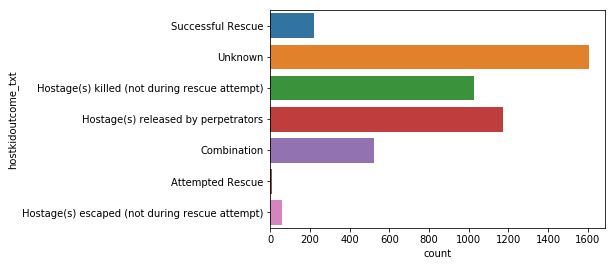

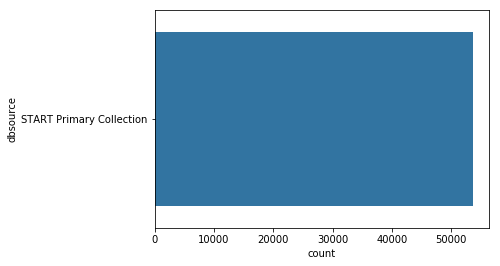

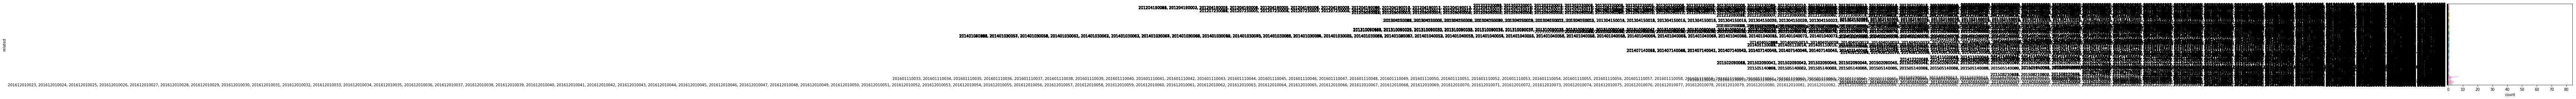

In [28]:
# Plot bar plot for each categorical feature

for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show(feature)

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br id="segmentations">
# 4. Segmentations

Next, let's create some segmentations. Segmentations are powerful ways to cut the data to observe the relationship between **categorical features** and **numeric features**.

<br>
Segment <code style="color:steelblue">'propvalue'</code> by <code style="color:steelblue">'attacktype1_txt'</code> and plot the resulting distributions

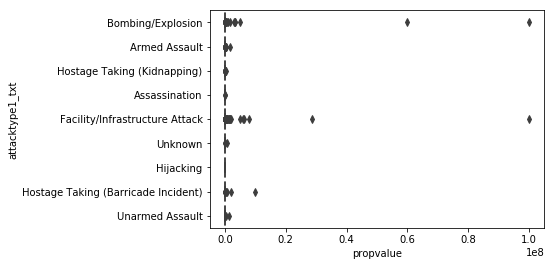

In [30]:
# Segment tx_price by Building Type and plot distributions
sns.boxplot(y='attacktype1_txt', x='propvalue', data=df)

Segment by <code style="color:steelblue">'attacktype1_txt'</code> and calculate the average value of each feature within each class:

In [32]:
# Segment by property_type and display the means within each class
df.groupby('attacktype1_txt').mean()

eventid        iyear    imonth  \
attacktype1_txt                                                            
Armed Assault                        2.014009e+11  2014.098450  6.453631   
Assassination                        2.014353e+11  2014.177187  6.322955   
Bombing/Explosion                    2.014181e+11  2014.140600  6.415431   
Facility/Infrastructure Attack       2.014568e+11  2014.302905  6.387275   
Hijacking                            2.015547e+11  2014.664234  6.649635   
Hostage Taking (Barricade Incident)  2.016009e+11  2014.596244  6.469484   
Hostage Taking (Kidnapping)          2.014953e+11  2014.458687  6.548159   
Unarmed Assault                      2.015847e+11  2014.512712  7.072034   
Unknown                              2.016334e+11  2014.792281  6.966515   

                                          iday     country    region  \
attacktype1_txt                                                        
Armed Assault                        15.664854  127.451002  8.091107   
Assassination                        15.685253  124.397962  7.703368   
Bombing/Explosion                    15.689623  114.388881  8.297642   
Facility/Infrastructure Attack       15.278354  147.668741  7.426349   
Hijacking                            15.905109  153.065693  8.905109   
Hostage Taking (Barricade Incident)  16.319249  128.192488  8.065728   
Hostage Taking (Kidnapping)          15.727809  130.386449  8.353872   
Unarmed Assault                      15.029661  121.762712  7.576271   
Unknown                              15.792281  103.332009  8.367196   

                                      latitude  longitude  specificity  \
attacktype1_txt                                                          
Armed Assault                        23.746314  51.400196     1.508657   
Assassination                        23.231218  59.861243     1.426267   
Bombing/Explosion                    29.008884  51.845605     1.387534   
Facility/Infrastructure Attack       25.022339  49.220903     1.486169   
Hijacking                            19.875904  45.182461     1.759124   
Hostage Taking (Barricade Incident)  22.672766  49.970325     1.464789   
Hostage Taking (Kidnapping)          23.570651  49.422255     1.723324   
Unarmed Assault                      30.530127  45.925514     1.415254   
Unknown                              25.900283  48.554130     1.905221   

                                     vicinity  crit1  crit2     crit3  \
attacktype1_txt                                                         
Armed Assault                        0.066086    1.0    1.0  0.999819   
Assassination                        0.052080    1.0    1.0  1.000000   
Bombing/Explosion                    0.062129    1.0    1.0  1.000000   
Facility/Infrastructure Attack       0.057400    1.0    1.0  0.999654   
Hijacking                            0.109489    1.0    1.0  1.000000   
Hostage Taking (Barricade Incident)  0.056338    1.0    1.0  1.000000   
Hostage Taking (Kidnapping)          0.068933    1.0    1.0  1.000000   
Unarmed Assault                      0.076271    1.0    1.0  0.991525   
Unknown                              0.056754    1.0    1.0  1.000000   

                                     doubtterr  multiple   success   suicide  \
attacktype1_txt                                                                
Armed Assault                              0.0  0.172151  0.933098  0.000181   
Assassination                              0.0  0.033116  0.585338  0.028305   
Bombing/Explosion                          0.0  0.200573  0.831604  0.091071   
Facility/Infrastructure Attack             0.0  0.336445  0.959544  0.000000   
Hijacking                                  0.0  0.116788  0.919708  0.007299   
Hostage Taking (Barricade Incident)        0.0  0.154930  0.985915  0.154930   
Hostage Taking (Kidnapping)                0.0  0.132436  0.980878  0.005430   
Unarmed Assault                            0.0  0.105932  0.944915  0.004

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Number of People Killed</span>



How else do the different attack types differ? Let's see: Number of civilians killed in attack

<br>
**First, segment <code style="color:steelblue">'nkill'</code> by <code style="color:steelblue">'attacktype1_txt'</code> and plot the boxplots.**

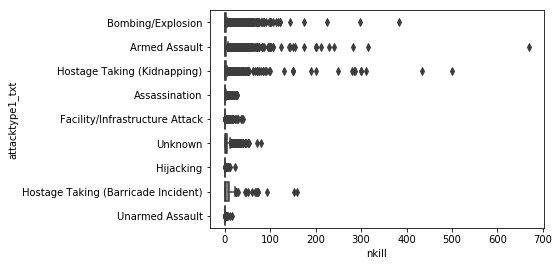

In [33]:
# Segment nkill and attacktype1_txt distributions
sns.boxplot(y='attacktype1_txt', x='nkill', data=df)

<br>
**After producing the plot, consider these questions:**
* Which type of attack is deadlier, on average?
* Which type of attack sees greater variance in people killed?
* Does the difference in distributions between classes make intuitive sense?

<br>
**Next, display the standard deviations of each feature alongside their means after performing a groupby.**
* This will give you a better idea of the variation within in feature, by class.
* **Tip:** Pass a list of metrics into the <code style="color:steelblue">.agg()</code> function, after performing your groupby.
* Check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for more help.

In [34]:
# Segment by property_type and display the means and standard deviations within each class
df.groupby('attacktype1_txt').agg(['mean', 'std'])

eventid                      iyear  \
                                             mean           std         mean   
attacktype1_txt                                                                
Armed Assault                        2.014009e+11  4.900970e+08  2014.098450   
Assassination                        2.014353e+11  4.958696e+08  2014.177187   
Bombing/Explosion                    2.014181e+11  4.932595e+08  2014.140600   
Facility/Infrastructure Attack       2.014568e+11  4.982144e+08  2014.302905   
Hijacking                            2.015547e+11  4.988178e+08  2014.664234   
Hostage Taking (Barricade Incident)  2.016009e+11  4.908590e+08  2014.596244   
Hostage Taking (Kidnapping)          2.014953e+11  5.000367e+08  2014.458687   
Unarmed Assault                      2.015847e+11  4.938131e+08  2014.512712   
Unknown                              2.016334e+11  4.820207e+08  2014.792281   

                                                 imonth                 iday  \
                                          std      mean       std       mean   
attacktype1_txt                                                                
Armed Assault                        1.299874  6.453631  3.373246  15.664854   
Assassination                        1.309980  6.322955  3.387511  15.685253   
Bombing/Explosion                    1.331735  6.415431  3.419834  15.689623   
Facility/Infrastructure Attack       1.273503  6.387275  3.584154  15.278354   
Hijacking                            1.106647  6.649635  3.137982  15.905109   
Hostage Taking (Barricade Incident)  1.211729  6.469484  3.418217  16.319249   
Hostage Taking (Kidnapping)          1.199151  6.548159  3.397866  15.727809   
Unarmed Assault                      1.273230  7.072034  3.203572  15.029661   
Unknown                              1.108015  6.966515  3.350526  15.792281   

                                                  country              \
                                          std        mean         std   
attacktype1_txt                                                         
Armed Assault                        8.842779  127.451002   99.327983   
Assassination                        8.725881  124.397962   89.529828   
Bombing/Explosion                    8.799661  114.388881   77.243186   
Facility/Infrastructure Attack       8.947112  147.668741  133.277383   
Hijacking                            8.353304  153.065693   96.352616   
Hostage Taking (Barricade Incident)  8.759978  128.192488   85.296627   
Hostage Taking (Kidnapping)          8.743318  130.386449  107.561408   
Unarmed Assault                      8.359169  121.762712  107.023495   
Unknown                              8.832339  103.332009  119.354503   

                                       region             latitude             \
                                         mean       std       mean        std   
attacktype1_txt                                                                 
Armed Assault                        8.091107  2.436342  23.746314  13.412920   
Assassination                        7.703368  2.399930  23.231218  13.764966   
Bombing/Explosion                    8.297642  2.174306  29.008884  10.756955   
Facility/Infrastructure Attack       7.426349  2.477384  25.022339  18.369563   
Hijacking                            8.905109  2.490816  19.875904  14.306935   
Hostage Taking (Barricade Incident)  8.065728  2.503846  22.672766  16.349886   
Hostage Taking (Kidnapping)          8.353872  2.379991  23.570651  13.012258   
Unarmed Assault                      7.576271  2.367894  30.530127  13.164535   
Unknown                              8.367196  2.286844  25.900283  12.740806   

                                     longitude            specificity  \
                                          mean        std        mean   
attacktype1_txt                                                         
Armed Assault                        51.400196  33.

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<br id="correlations">
# 5. Correlations

Finally, let's take a look at the relationships between **numeric features** and **other numeric features**.

<br>
Create a <code style="color:steelblue">correlations</code> dataframe from <code style="color:steelblue">df</code>.

In [35]:
# Calculate correlations between numeric features
correlations = df.corr()

In [36]:
correlations

eventid     iyear    imonth      iday   country    region  \
eventid           1.000000  0.854889 -0.035440 -0.005426 -0.004330  0.066484   
iyear             0.854889  1.000000 -0.045752 -0.006513  0.003649  0.097649   
imonth           -0.035440 -0.045752  1.000000  0.006887  0.018998  0.020243   
iday             -0.005426 -0.006513  0.006887  1.000000 -0.005612  0.007922   
country          -0.004330  0.003649  0.018998 -0.005612  1.000000  0.181041   
region            0.066484  0.097649  0.020243  0.007922  0.181041  1.000000   
latitude         -0.021456 -0.024926  0.013070  0.021489 -0.132164 -0.001924   
longitude        -0.029380 -0.046985 -0.018950  0.001490 -0.127807 -0.469845   
specificity       0.011667  0.028277  0.012877 -0.000306 -0.123142 -0.122779   
vicinity         -0.010709 -0.020984 -0.012747 -0.000643  0.026393 -0.005809   
crit1                  NaN       NaN       NaN       NaN       NaN       NaN   
crit2                  NaN       NaN       NaN       NaN       NaN       NaN   
crit3            -0.003257 -0.002985  0.005789  0.002705 -0.007715  0.006604   
doubtterr              NaN       NaN       NaN       NaN       NaN       NaN   
multiple         -0.009779 -0.005139 -0.003073 -0.003838  0.020439  0.095692   
success          -0.059095 -0.056575 -0.006016 -0.009915 -0.026622  0.076490   
suicide           0.031622  0.023236  0.004312 -0.001142 -0.052218  0.078289   
attacktype1       0.079333  0.100531  0.023209 -0.003500  0.018273 -0.003250   
attacktype2       0.179647  0.202044 -0.039708  0.020305  0.020463  0.141989   
attacktype3       0.293345  0.255667  0.072985 -0.192421 -0.005006  0.164383   
targtype1         0.088121  0.101669  0.012931  0.010575  0.055383  0.081533   
targsubtype1      0.062097  0.072578  0.014499  0.008501  0.080646  0.103456   
natlty1          -0.016712 -0.012403  0.018980 -0.006152  0.767445  0.178339   
targtype2         0.043517  0.047536  0.016750  0.038349 -0.024942  0.112228   
targsubtype2      0.043327  0.047509  0.016734  0.038162 -0.024687  0.111566   
natlty2           0.037782  0.045310  0.019506  0.016797  0.694321  0.224500   
targtype3        -0.004266  0.018476  0.040186 -0.073378  0.023513  0.043673   
targsubtype3      0.029693  0.049366  0.026262 -0.055136  0.020265  0.036793   
natlty3           0.092710  0.109611  0.002825 -0.007823  0.594184  0.254456   
guncertain1      -0.093168 -0.111170 -0.020679  0.004689  0.047123  0.030008   
...                    ...       ...       ...       ...       ...       ...   
claim3            0.082144  0.061832  0.279325  0.143588  0.115736 -0.074417   
claimmode3       -0.213092 -0.400030 -0.264056 -0.147346 -0.101132  0.407896   
compclaim        -0.096821 -0.054398  0.155601 -0.020336 -0.133067 -0.091522   
weaptype1         0.099099  0.118747  0.027647 -0.003901  0.007622  0.035608   
weapsubtype1      0.025092  0.020848 -0.000975 -0.003918 -0.045433  0.072347   
weaptype2         0.153324  0.179958  0.002921  0.025086  0.044768  0.119385   
weapsubtype2      0.033173  0.072870  0.027273  0.019096 -0.020071  0.075616   
weaptype3         0.152990  0.168079 -0.027451  0.085014  0.042701  0.194199   
weapsubtype3      0.149858  0.164901 -0.090675  0.017104  0.101546  0.262176   
weaptype4              NaN       NaN       NaN       NaN       NaN       NaN   
weaptype4_txt          NaN       NaN       NaN       NaN       NaN       NaN   
weapsubtype4           NaN       NaN       NaN       NaN       NaN       NaN   
weapsubtype4_txt       NaN       NaN       NaN       NaN       NaN       NaN   
nkill             0.020773  0.031079  0.007327 -0.003981  0.000668  0.099622   
nkillter          0.034213  0.039231  0.011641 -0.005129 -0.029612  0.019180   
nwound            0.008263  0.001199  0.002138  0.002243 -0.014208  0.075597   
property         -0.095057 -0.108084 -0.013959 -0.005566  0.021100 -0.126565   
propextent        0.055242  0.083240  0.033795 -0.024275  0.007406 -0.016511   
propvalue         0

Visualize the correlation grid with a heatmap to make it easier to digest.

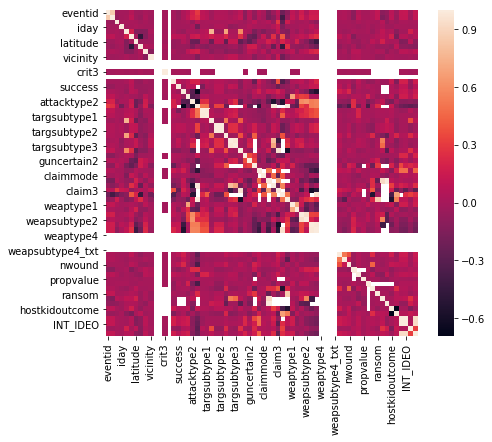

In [37]:
# Make the figsize 7 x 6
plt.figure(figsize=(7,6))
# Plot heatmap of correlations
sns.heatmap(correlations)

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Correlation Heatmap</span>

When plotting a heatmap of correlations, it's often helpful to do four things:
1. Change the background to white. This way, 0 correlation will show as white
2. Annotate the cell with their correlations values
3. Mask the top triangle (less visual noise)
4. Drop the legend (colorbar on the side)

<br>
**First, change the background to white.**
* Seaborn has several different **themes**. The default theme is called <code style="color:crimson">'darkgrid'</code>.
* You can change the theme with <code style="color:steelblue">sns.set_style()</code>.
* You only need to run this once, and the theme will persist until you change it again.
* Change the theme to <code style="color:crimson">'white'</code>
* Make the figure size 10 x 8

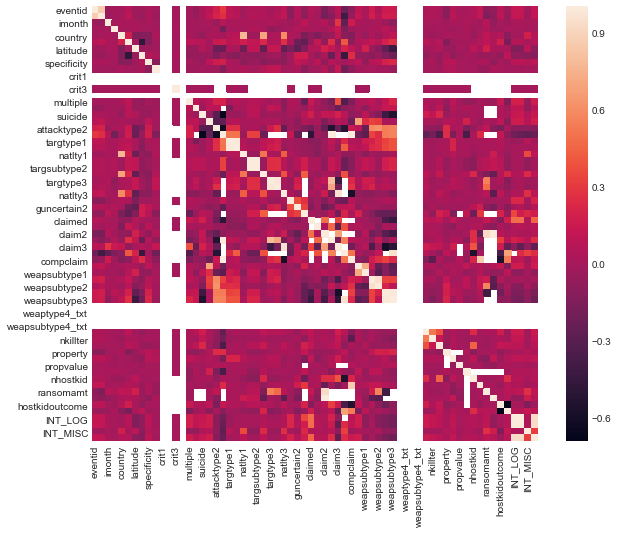

In [38]:
# Change color scheme
sns.set_style("white")

# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

# Plot heatmap of correlations
sns.heatmap(correlations)

See how the cells for some values are now white? That's what we want because they were not able to be calculated.



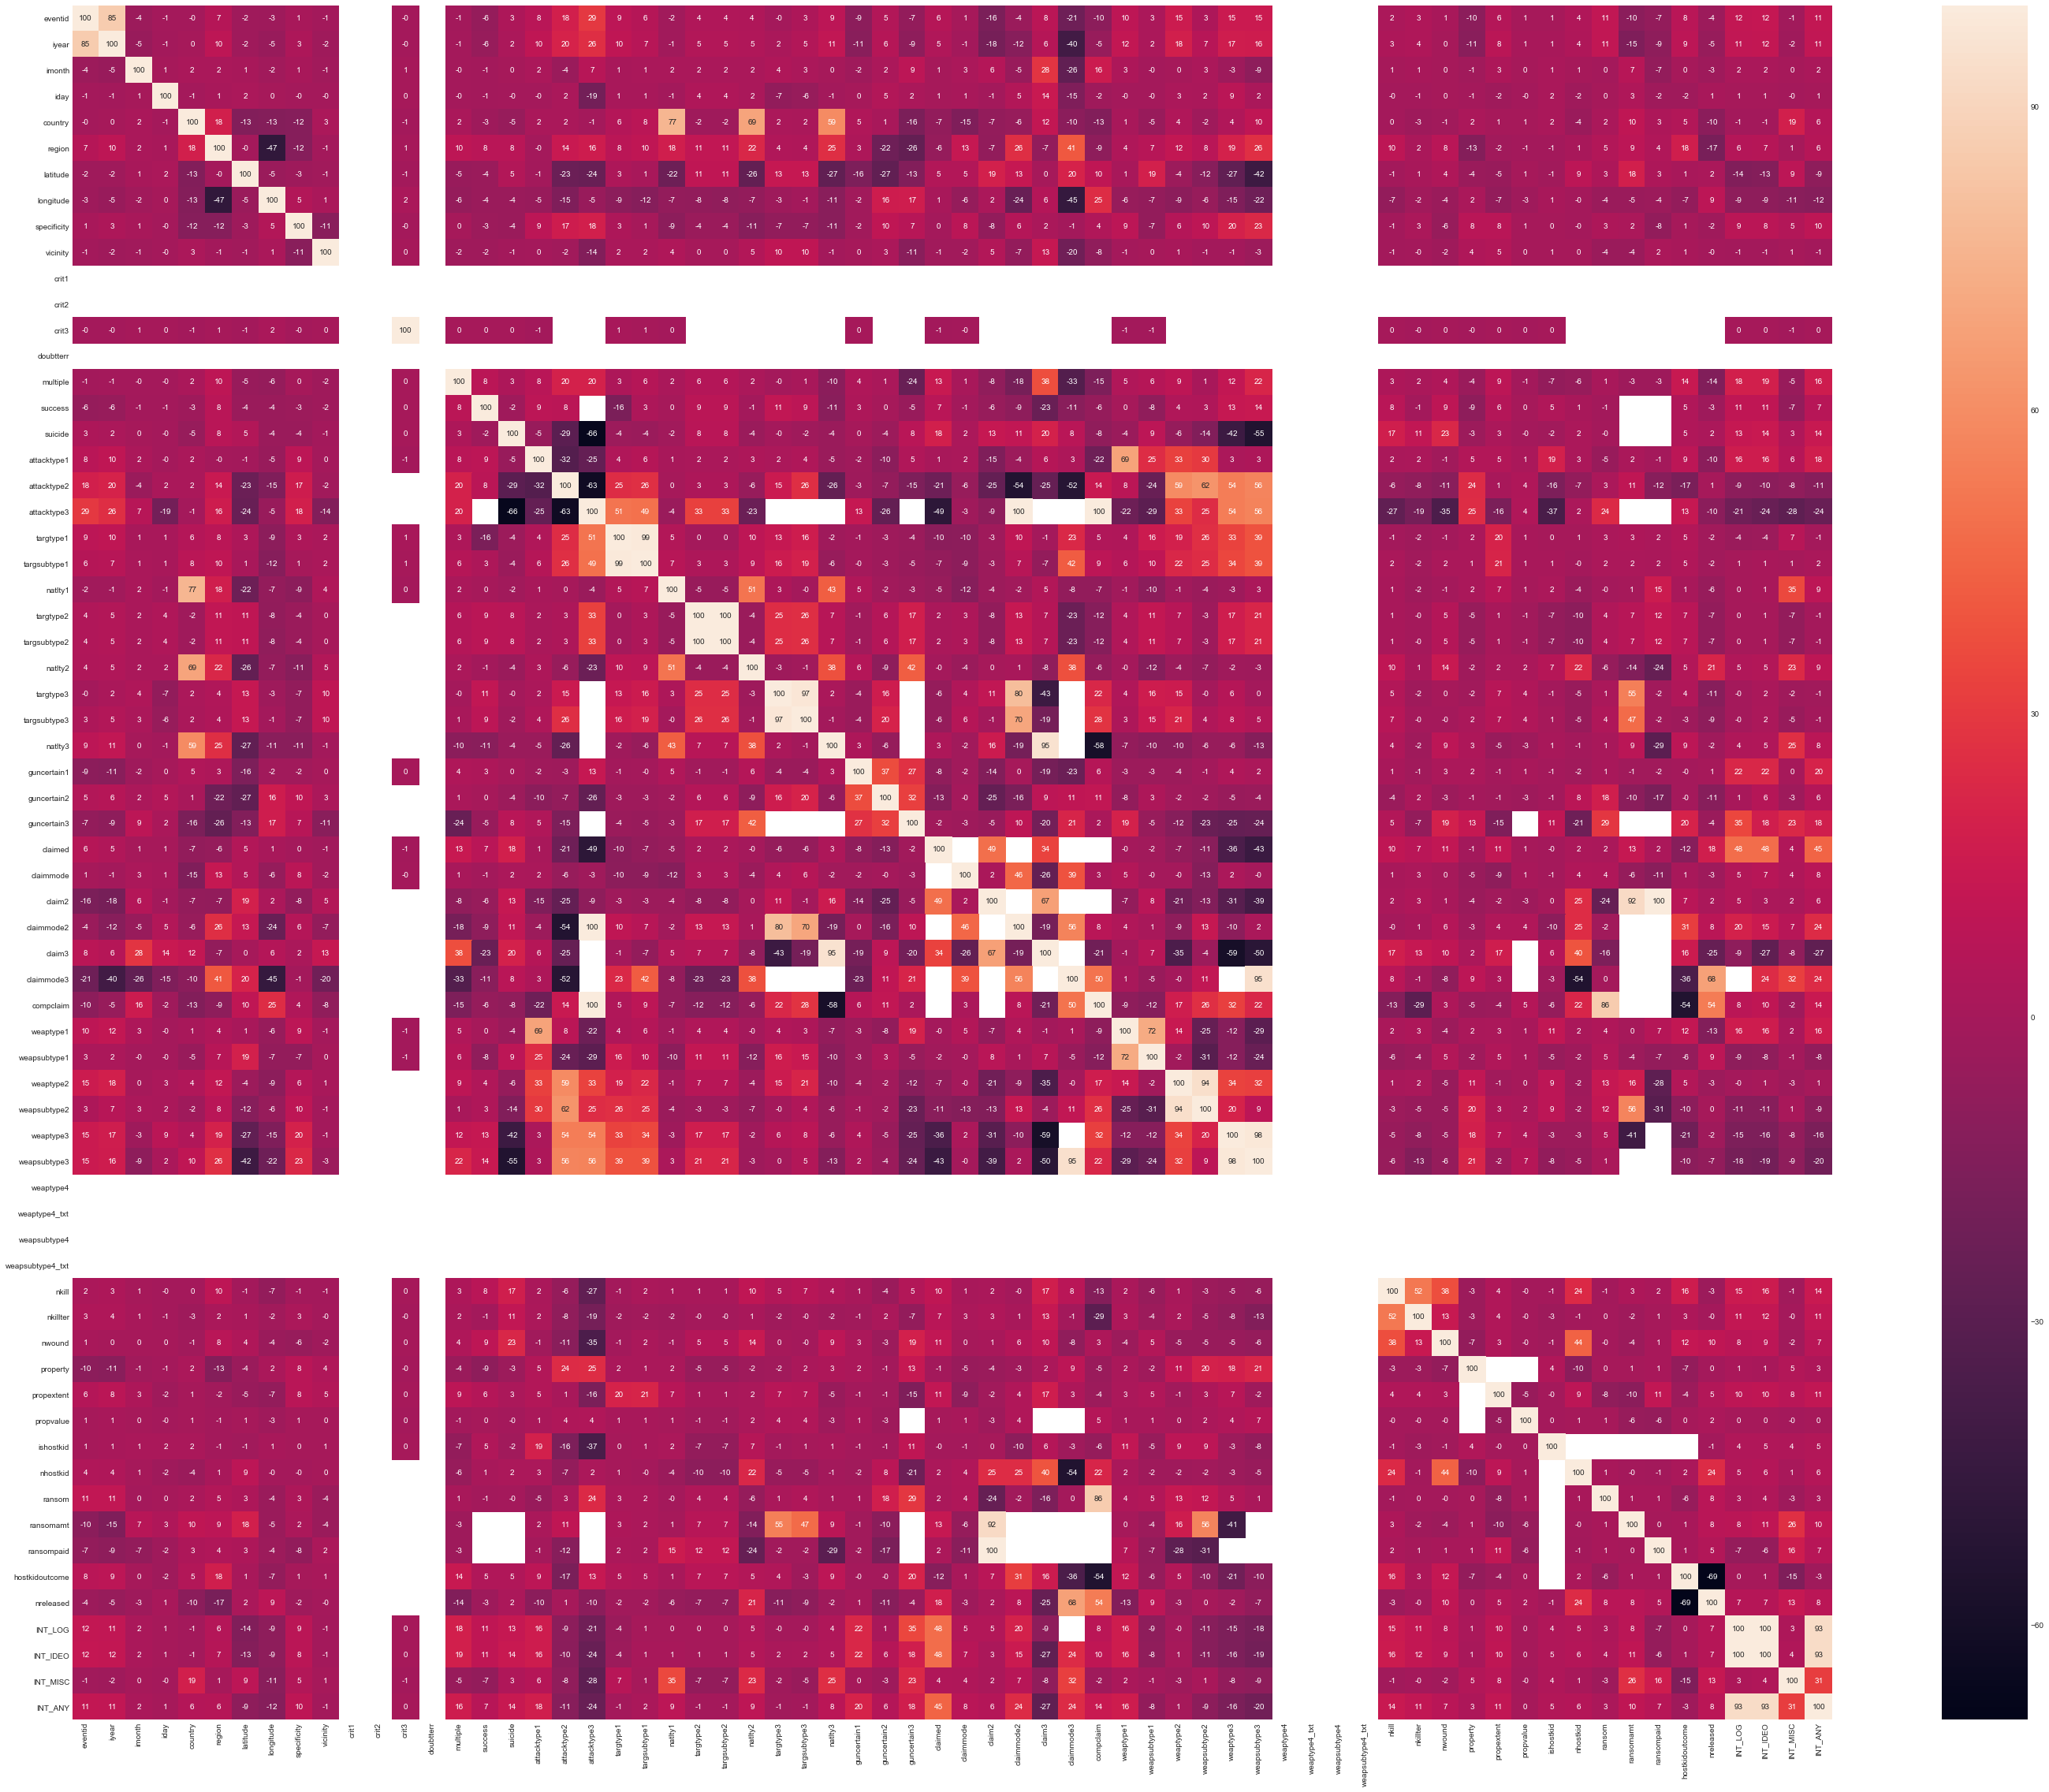

In [39]:
# Make the figsize 10 x 8
plt.figure(figsize=(50,40))

# Plot heatmap of annotated correlations
sns.heatmap(correlations * 100, annot=True, fmt='.0f')

<br>
**Next, we'll generate a mask for the top triangle. Run this code:**

In [40]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

<br>
**Plot the heatmap again, this time using that mask.**
* <code style="color:steelblue">sns.heatmap()</code> has a <code style="color:steelblue">mask=</code> argument.
* Keep all of the other styling changes you've made up to now.

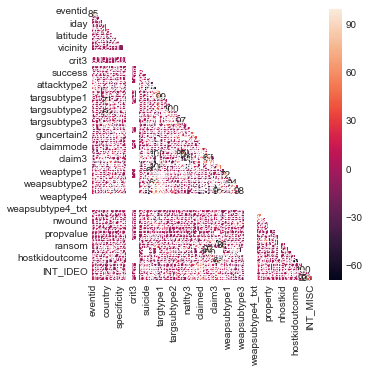

In [41]:
# Make the figsize 10 x 8
plt.figure(figsize=(5,5))

# Plot heatmap of correlations
sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask)


<br>
**Finally, remove the colorbar on the side.**
* <code style="color:steelblue">sns.heatmap()</code> has a <code style="color:steelblue">cbar=</code> argument. By default, it's <code style="color:crimson">True</code>.
* Keep all of the other styling changes you've made up to now.
* But change the figure size(since we're removing the sidebar, this will help us keep nice proportions)

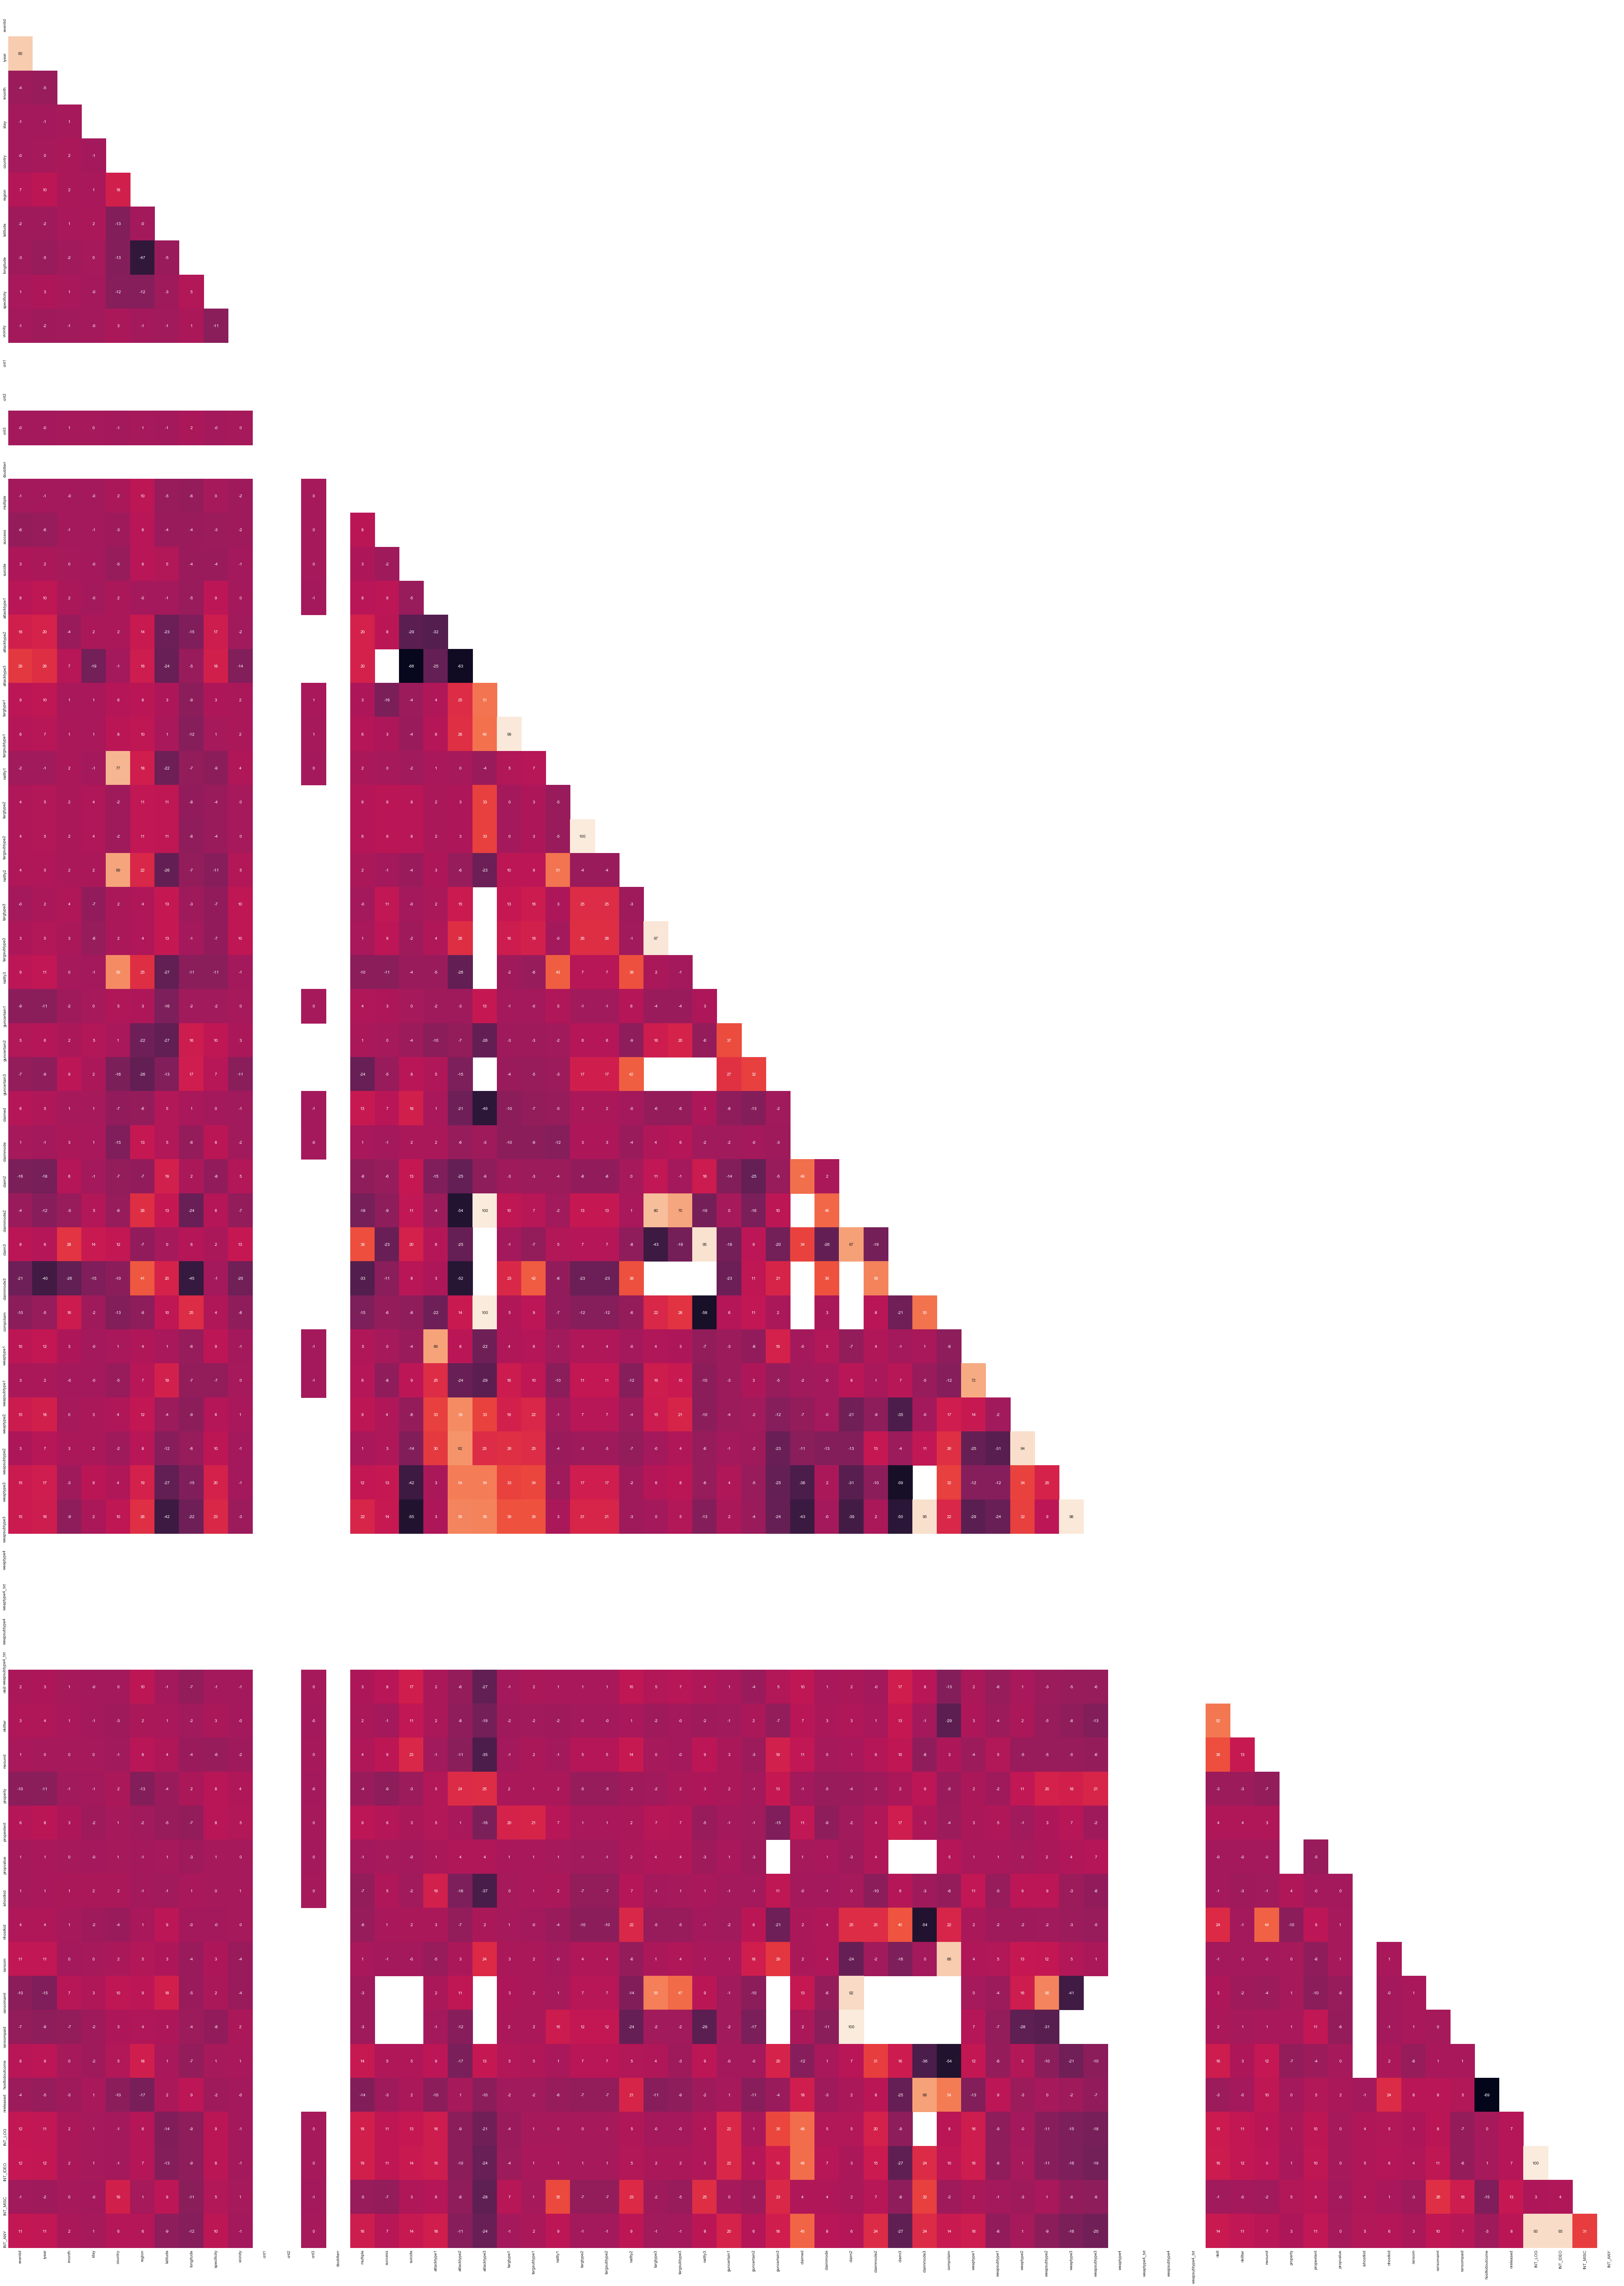

In [48]:
# Make the figsize 9 x 8
plt.figure(figsize=(70,100))

# Plot heatmap of correlations
sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask, cbar=False)

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>